In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
from pylab import *
import matplotlib.pyplot  as plt
%matplotlib notebook

In [2]:
def loadpos(s1):
    s1 = s1.replace('=','').replace(']','').replace('[','').replace(',','')
    d = []
    for line in s1.split('\n'):
        if line.strip() == '':
            continue
        bits = line.split()
        d.append({'AntNo':int(bits[0]), 
                  'X':float(bits[1]), 
                  'Y':float(bits[2]), 
                  'Z':float(bits[3])})

            
    d = pd.DataFrame(d)
    d = d.set_index('AntNo')
    d['dist'] = np.sqrt(d['X']**2 + d['Y']**2 + d['Z']**2)
    return d

In [3]:
# (craft)20190609072209$ echo $fcm
# /data/FRIGG_2/ban115/voltages/FRB190608/fcm.txt
#  grep itrf $fcm | sort | grep -v ant90 | sed s/common.antenna.ant// | sed s/.location.itrf// 

s1 = '''
10 = [-2556058.24523933, 5097558.82324113, -2848177.01072636]
11 = [-2556396.03998823, 5097419.07827756, -2848123.14233504]
12 = [-2556496.23076351, 5097333.70545929, -2848187.33092385]
13 = [-2556407.32626464, 5097064.98195834, -2848756.02731104]
14 = [-2555972.78185493, 5097233.67465791, -2848839.91219962]
15 = [-2555393.77284881, 5097672.55076197, -2848566.14558399]
16 = [-2555592.92520897, 5097835.0284821, -2848098.26136699]
17 = [-2555749.03969129, 5097834.52119813, -2847957.81337936]
18 = [-2556068.18397269, 5097601.41105446, -2848090.83287549]
19 = [-2556379.59432774, 5097497.27748476, -2847996.55176853]
1 = [-2556088.476234, 5097405.971301, -2848428.398018]
20 = [-2556604.06995528, 5097302.0609443, -2848146.77618185]
21 = [-2556766.05699007, 5097223.67586117, -2848140.81544191]
22 = [-2556911.14478363, 5097156.5372304, -2848128.2205107]
23 = [-2555953.73691116, 5097143.01590959, -2849015.54304376]
24 = [-2555959.33441562, 5096979.55624385, -2849303.62346241]
25 = [-2555671.56307663, 5097939.84785934, -2847840.6308564]
26 = [-2555870.78708337, 5097845.4108448, -2847828.12830396]
27 = [-2555320.59475699, 5098257.81415525, -2847581.05325188]
28 = [-2556552.96109468, 5097767.17871994, -2847354.23963724]
29 = [-2556745.52975709, 5097448.32376132, -2847753.90742748]
2 = [-2556109.97953037, 5097388.70113492, -2848440.13354315]
30 = [-2557348.34201446, 5097170.09587318, -2847716.18015416]
31 = [-2558274.80654062, 5096802.60360628, -2847545.21307706]
32 = [-2558279.50982815, 5095040.03350299, -2850675.90355721]
33 = [-2555538.11875703, 5096270.68838609, -2850941.80786796]
34 = [-2553016.6733966, 5097932.88428577, -2850210.60253509]
35 = [-2554348.37924851, 5098774.82565361, -2847532.53815537]
36 = [-2556754.25867034, 5098661.28843513, -2845570.66143017]
3 = [-2556121.90976612, 5097392.35165232, -2848421.53643228]
4 = [-2556087.39501558, 5097423.58909109, -2848396.86603661]
5 = [-2556028.60810479, 5097451.46700776, -2848399.83308213]
6 = [-2556231.66816822, 5097388.01521953, -2848327.62191052]
7 = [-2556282.79068768, 5097252.12617786, -2848526.9778204]
8 = [-2556006.28517782, 5097327.96723779, -2848641.76590977]
9 = [-2555892.76816998, 5097560.0107358, -2848328.93296073]
'''

#(craft)20190609072209$ echo $fcm
#/data/FRIGG_2/ban115/voltages/FRB190608/fcm.txt
# grep itrf $fcm | grep -v 90 | sed s/common.antenna.ant// | sed s/.location.itrf//
s2 = '''
10 = [-2556058.25025956, 5097558.8205191, -2848177.00908004]
11 = [-2556396.04020497, 5097419.07608875, -2848123.14038369]
12 = [-2556496.22985721, 5097333.70242281, -2848187.32958421]
13 = [-2556407.31899517, 5097064.97710125, -2848756.024218]
14 = [-2555972.77986549, 5097233.6710341, -2848839.91406186]
15 = [-2555393.77958708, 5097672.54855343, -2848566.140817]
16 = [-2555592.93326148, 5097835.02929023, -2848098.253681]
17 = [-2555749.0484917, 5097834.51810219, -2847957.806244]
18 = [-2556068.18303644, 5097601.40805124, -2848090.824322]
19 = [-2556379.59556947, 5097497.28039782, -2847996.55291911]
1 = [-2556088.476234, 5097405.971301, -2848428.398018]
24 = [-2555959.32670701, 5096979.55470893, -2849303.61847]
25 = [-2555671.5733176, 5097939.84529581, -2847840.623616]
26 = [-2555870.79438473, 5097845.41203761, -2847828.123918]
27 = [-2555320.61289696, 5098257.80990442, -2847581.05193]
28 = [-2556552.96778644, 5097767.17649864, -2847354.236839]
2 = [-2556109.98127523, 5097388.70057204, -2848440.134789]
30 = [-2557348.33476357, 5097170.09815461, -2847716.179058]
31 = [-2558274.80076695, 5096802.60779311, -2847545.22697]
32 = [-2558279.47008167, 5095040.04278619, -2850675.901399]
33 = [-2555538.10450637, 5096270.68195607, -2850941.80723261]
34 = [-2553016.69504097, 5097932.87515857, -2850210.579673]
36 = [-2556754.28159348, 5098661.28851609, -2845570.658539]
3 = [-2556121.90975167, 5097392.34840618, -2848421.536983]
4 = [-2556087.39584651, 5097423.58533607, -2848396.868329]
5 = [-2556028.60951961, 5097451.46393354, -2848399.83388798]
6 = [-2556231.67182537, 5097388.01360104, -2848327.62415979]
8 = [-2556006.2845206, 5097327.96456414, -2848641.764927]
'''

p1 = loadpos(s1)
p2 = loadpos(s2)


In [4]:
diff = p2.subtract(p1)
print(diff)

              X         Y         Z      dist
AntNo                                        
1      0.000000  0.000000  0.000000  0.000000
2     -0.001745 -0.000563 -0.001246  0.000806
3      0.000014 -0.003246 -0.000551 -0.002356
4     -0.000831 -0.003755 -0.002292 -0.001645
5     -0.001415 -0.003074 -0.000806 -0.001531
6     -0.003657 -0.001618 -0.002249  0.001177
7           NaN       NaN       NaN       NaN
8      0.000657 -0.002674  0.000983 -0.002841
9           NaN       NaN       NaN       NaN
10    -0.005020 -0.002722  0.001646 -0.000899
11    -0.000217 -0.002189  0.001951 -0.002535
12     0.000906 -0.003036  0.001340 -0.003390
13     0.007269 -0.004857  0.003093 -0.008182
14     0.001989 -0.003624 -0.001862 -0.002863
15    -0.006738 -0.002209  0.004767 -0.001195
16    -0.008053  0.000808  0.007686  0.000441
17    -0.008800 -0.003096  0.007135 -0.002136
18     0.000936 -0.003003  0.008553 -0.006599
19    -0.001242  0.002913 -0.001151  0.003342
20          NaN       NaN       Na

In [5]:
print(diff[diff['dist'] > 0.001])

              X         Y         Z      dist
AntNo                                        
6     -0.003657 -0.001618 -0.002249  0.001177
19    -0.001242  0.002913 -0.001151  0.003342
26    -0.007301  0.001193  0.004386  0.001922
27    -0.018140 -0.004251  0.001322  0.003282
31     0.005774  0.004187 -0.013893  0.007237
36    -0.022923  0.000081  0.002891  0.007969


In [6]:
print(diff['dist'].max())


0.007968761958181858


In [7]:
p1

,X,Y,Z,dist
AntNo,,,,
10,-2.556058e+06,5.097559e+06,-2.848177e+06,6.374218e+06
11,-2.556396e+06,5.097419e+06,-2.848123e+06,6.374217e+06
12,-2.556496e+06,5.097334e+06,-2.848187e+06,6.374218e+06
13,-2.556407e+06,5.097065e+06,-2.848756e+06,6.374222e+06
14,-2.555973e+06,5.097234e+06,-2.848840e+06,6.374220e+06
15,-2.555394e+06,5.097673e+06,-2.848566e+06,6.374216e+06
16,-2.555593e+06,5.097835e+06,-2.848098e+06,6.374217e+06
17,-2.555749e+06,5.097835e+06,-2.847958e+06,6.374216e+06
18,-2.556068e+06,5.097601e+06,-2.848091e+06,6.374217e+06


In [8]:
p1.columns

Index(['X', 'Y', 'Z', 'dist'], dtype='object')

In [9]:
p1.index

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  1, 20, 21, 22, 23, 24, 25,
            26, 27, 28, 29,  2, 30, 31, 32, 33, 34, 35, 36,  3,  4,  5,  6,  7,
             8,  9],
           dtype='int64', name='AntNo')

<IPython.core.display.Javascript object>


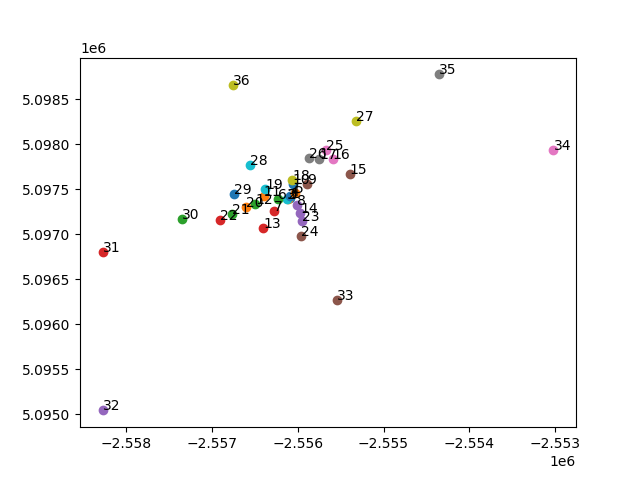

In [10]:
figure()
coords = np.zeros((36,3))
for r in p1.iterrows():
    x = r[1]['X']
    y = r[1]['Y']
    z = r[1]['Z']
    
    antno = str(r[0])
    scatter(x,y)
    text(x,y,str(antno))
    coords[int(antno)-1,:] = (x,y,z)

<IPython.core.display.Javascript object>


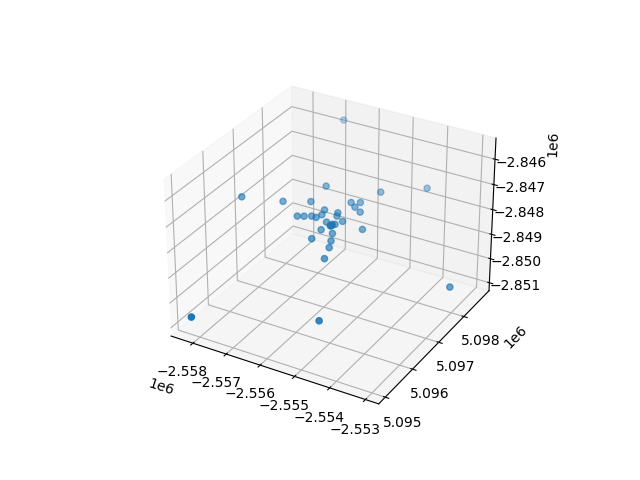

In [11]:
fig = figure()
ax = plt.axes(projection='3d')
ax.scatter3D(coords[:,0],coords[:,1],coords[:,2])

In [12]:
# find best fitting plane
# subtract out the centroid and take the SVD
svd = np.linalg.svd(coords.T - np.mean(coords.T, axis=1, keepdims=True))

# Extract the left singular vectors
left = svd[0]
left.shape

(3, 3)

In [13]:
plane_norm = left[:,-1]
plane_norm

array([ 0.40012573, -0.79977631,  0.44750111])

<IPython.core.display.Javascript object>


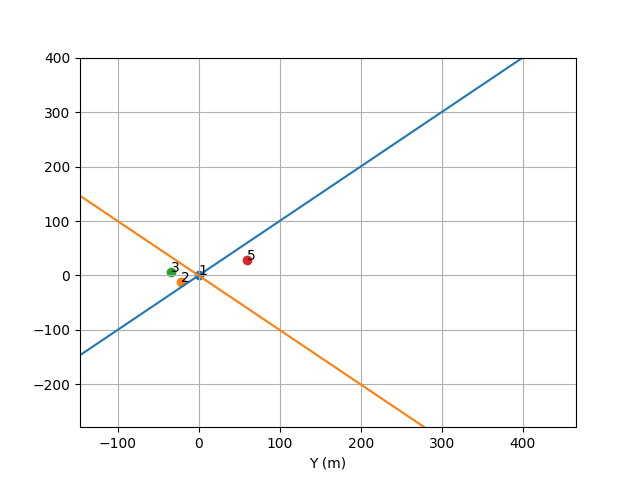

[-2556088.476234  5097405.971301 -2848428.398018] [0. 0. 0.] [-2556088.476234  5097405.971301 -2848428.398018]
[-2556109.97953037  5097388.70113492 -2848440.13354315] [-21.50329637 -17.27016608 -11.73552515] [-2556109.96215971  5097388.66641422 -2848440.11411578]
[-2556121.90976612  5097392.35165232 -2848421.53643228] [-33.43353212 -13.61964868   6.86158572] [-2556122.14408902  5097392.82001986 -2848421.7984993 ]
[-2556028.60810479  5097451.46700776 -2848399.83308213] [59.86812921 45.49570676 28.56493587] [-2556028.74864135  5097451.74791399 -2848399.99025839]
[-2556407.32626464  5097064.98195834 -2848756.02731104] [-318.85003064 -340.98934266 -327.62929304] [-2556406.73432821  5097063.7987884  -2848755.3652886 ]
[-2555393.77284881  5097672.55076197 -2848566.14558399] [ 694.70338519  266.57946097 -137.74756599] [-2555395.02227033  5097675.04812132 -2848567.54293857]
[-2556379.59432774  5097497.27748476 -2847996.55176853] [-291.11809374   91.30618376  431.84624947] [-2556381.09212426  5

In [14]:
figure()
# adam says only thes antennas are good
goodants  = np.array([1,2,3,5,13,15,19,24,25,26,31,33]) # 1 based
coords = coords[goodants-1,:]
for ip, p in enumerate(coords):
    
    v = p - coords[0,:]
    dist = np.dot(v,plane_norm)
    proj = p - dist*plane_norm
    print(p,v,proj)
    d = proj - coords[0,:]
    
    scatter(d[0],d[2])
    text(d[0],d[2],str(goodants[ip]))
    
t = 3000

plot([-t,t],[-t,t])
plot([-t,t],[t,-t])
grid()
xlabel('X (m)')
xlabel('Y (m)')
     
subarrays = [[12,19,20,21,22,29,28,30,36],
            ]

In [15]:
sub_arrays = [[],[],[],[]]
nant = 36

for ant in range(nant):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-15-5d5b8b061db1>, line 5)